# Example for Theorem 4.2

In [1]:
def random_mat_set(n,q):
    f = GF(q)
    A = random_matrix(f, n, n)
    # A = jordan_block(f(2),n)
    D = diagonal_matrix([f.random_element() for _ in range(n)])
    P = D*A
    return P, D, A

## How many are cyclic up to nilpotent?

In [2]:
def is_pow_x(poly):
    P = poly.parent()(poly)
    if P.is_zero():
        return False
    
    if not P.is_monomial():
        return False
    (exp, coeff), = P.dict().items()
    return coeff == 1
def is_cyc_nil(mat):
    return is_pow_x(mat.charpoly().quo_rem(mat.minpoly())[0])

In [3]:
def test(n,q):
    succ = 0
    for trial in range(100):
        P, D, A = random_mat_set(n,q)
        if is_cyc_nil(P): 
            succ += 1
    return succ/100

# Fix q = 31, vary n (1 to 50)
q > 6(6 - 1)

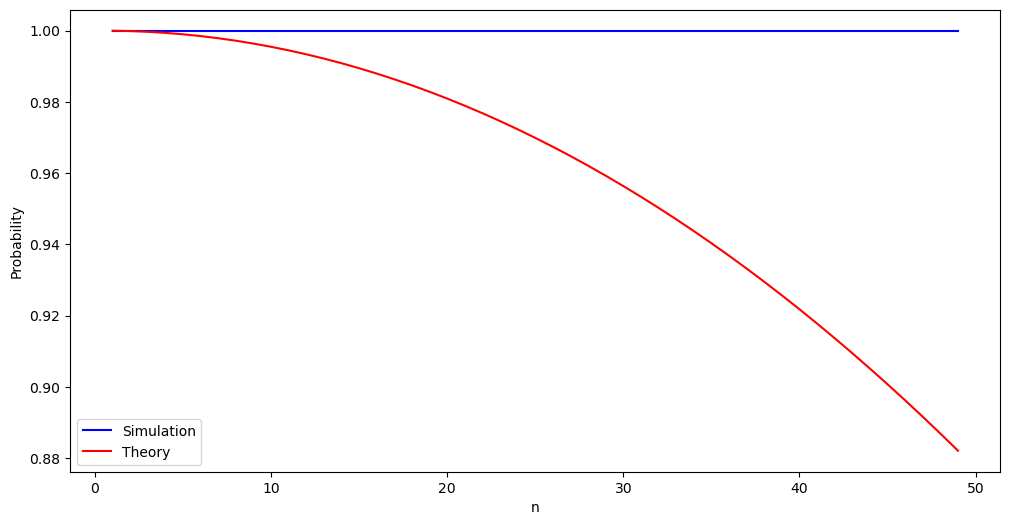

In [17]:
import matplotlib.pyplot as plt

q = 9973
Ns = list(range(1, 50))

results = []
theory = []

# Assuming test(n, q) is defined
for n in Ns:
    results.append(test(n, q))
    theory.append(max(1 - n*(n-1)/(2*q),0))

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(Ns, results, 'b-', markersize=4, label='Simulation')
plt.plot(Ns, theory, 'r-', label='Theory')
plt.xlabel('n')
plt.ylabel('Probability')
plt.legend()
plt.show()

# Fix n, vary q

[1]
[0.9999955001705435]


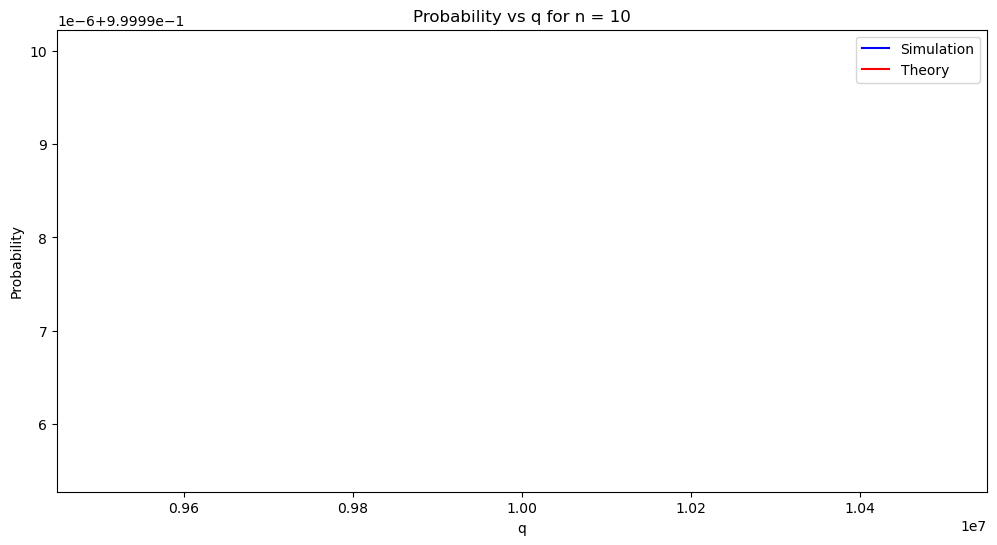

In [24]:
import matplotlib.pyplot as plt

n = 10
Qs = prime_range(10000379,10000380)

results = []
theory = []

for q in Qs:
    results.append(test(n, q))
    theory.append(max(float(1 - n*(n-1)/(2*q)),0))
print(results)
print(theory)
# Plotting
plt.figure(figsize=(12, 6))
plt.plot(Qs, results, 'b-', markersize=4, label='Simulation')  # blue circles
plt.plot(Qs, theory, 'r-', label='Theory')                     # red line
plt.xlabel('q')
plt.ylabel('Probability')
plt.title(f'Probability vs q for n = {n}')
plt.legend()
plt.show()


- matrix types vs prob

High level, understand result:
- Example, char != min (derogatory), diagonal **determinants calc**.
- 4.3 (JNF)
- 4.4, 4.5 (useful)
- Butterfly next (low priority)